In [8]:
import pandas as pd

In [2]:
data = pd.read_csv("temperature_device_failure.csv")

In [5]:
data

,timestamp,value
0,7/4/2013 0:00,69.880835
1,7/4/2013 1:00,71.220227
2,7/4/2013 2:00,70.877805
3,7/4/2013 3:00,68.959400
4,7/4/2013 4:00,69.283551
...,...,...
7262,5/28/2014 11:00,72.370206
7263,5/28/2014 12:00,72.172956
7264,5/28/2014 13:00,72.046565
7265,5/28/2014 14:00,71.825226


In [6]:
# Load the dataset
data = pd.read_csv('temperature_device_failure.csv')

# the column names and first few rows of the dataset
print(data.columns)  
print(data.head())   


Index(['timestamp', 'value'], dtype='object')
       timestamp      value
0  7/4/2013 0:00  69.880835
1  7/4/2013 1:00  71.220227
2  7/4/2013 2:00  70.877805
3  7/4/2013 3:00  68.959400
4  7/4/2013 4:00  69.283551


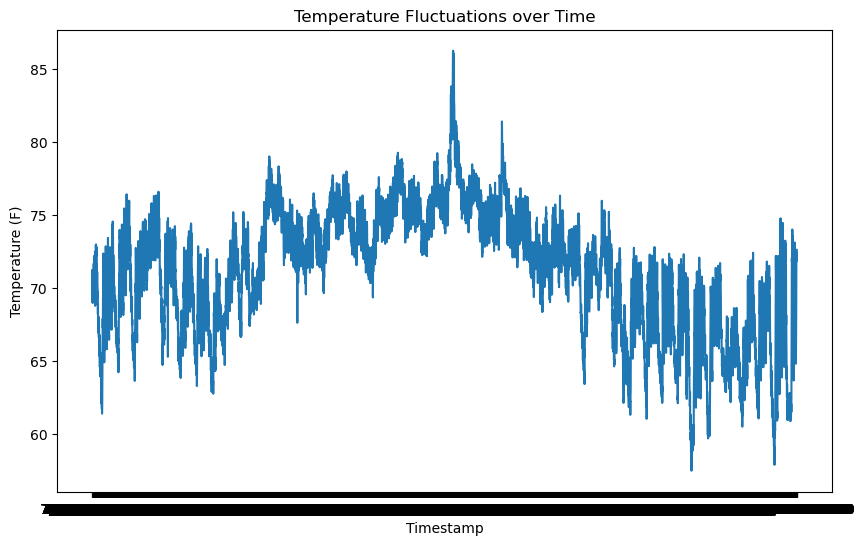

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

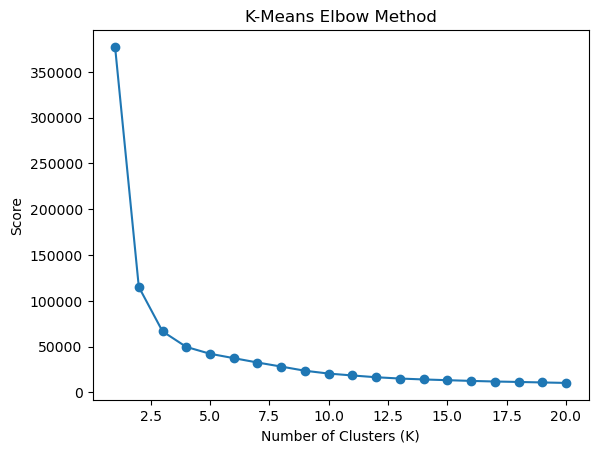

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


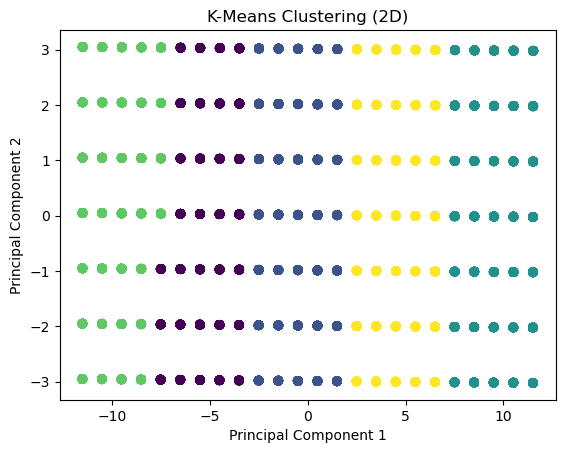

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

# Loaded the dataset and visualize the original data 
data = pd.read_csv('temperature_device_failure.csv')
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['value'])  
plt.xlabel('Timestamp')
plt.ylabel('Temperature (F)')
plt.title('Temperature Fluctuations over Time')
plt.show()

# Feature Engineering - Create 'dtcat' feature
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['hour'] = data['timestamp'].dt.hour

def categorize_time(row):
    if row['day_of_week'] < 5:  # Weekday
        if 7 <= row['hour'] <= 18:  # Daytime (7am - 7pm)
            return 'Weekday Day'
        else:  # Nighttime
            return 'Weekday Night'
    else:  # Weekend
        if 7 <= row['hour'] <= 18:  # Daytime (7am - 7pm)
            return 'Weekend Day'
        else:  # Nighttime
            return 'Weekend Night'

data['dtcat'] = data.apply(categorize_time, axis=1)

# Apply K-Means to find optimal K
X = data[['day_of_week', 'hour']]
scores = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

plt.plot(range(1, 21), scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.title('K-Means Elbow Method')
plt.show()

# Apply PCA and visualize K-Means clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
optimal_k = 5  
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (2D)')
plt.show()

# Anomaly Detection using Elliptic Envelope
envelope = EllipticEnvelope(contamination=0.01)  
envelope.fit(X)
anomalies = envelope.predict(X)

# Anomaly Detection using Isolation Forest
forest = IsolationForest(contamination=0.01)  
forest.fit(X)
anomalies_forest = forest.predict(X)


In [13]:
Performance Comparison

# Evaluate Elliptic Envelope anomalies
data['anomalies_elliptic'] = anomalies
elliptic_anomalies = data[data['anomalies_elliptic'] == -1]  # Filter anomalies

# Evaluate Isolation Forest anomalies
data['anomalies_forest'] = anomalies_forest
forest_anomalies = data[data['anomalies_forest'] == -1]  # Filter anomalies

# Compare the number of anomalies detected by each method
print("Elliptic Envelope Anomalies:", len(elliptic_anomalies))
print("Isolation Forest Anomalies:", len(forest_anomalies))



Elliptic Envelope Anomalies: 41
Isolation Forest Anomalies: 41


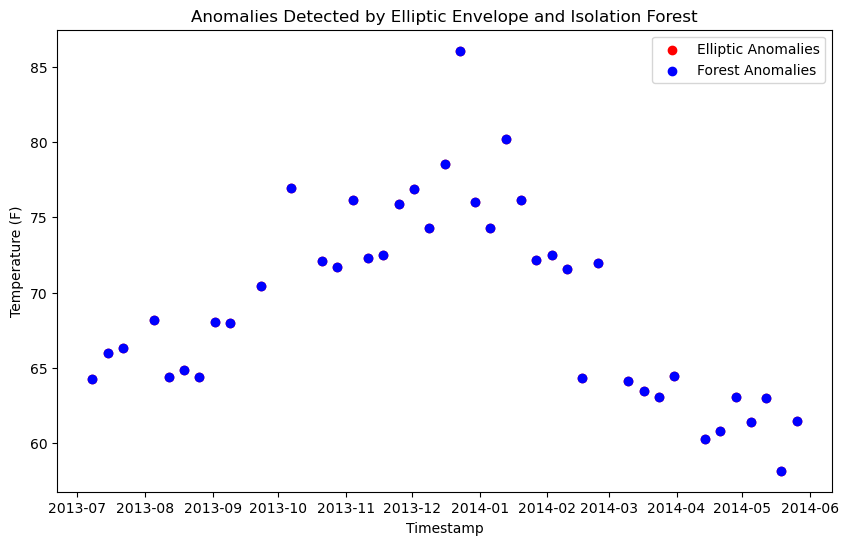

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(elliptic_anomalies['timestamp'], elliptic_anomalies['value'], color='red', label='Elliptic Anomalies')
plt.scatter(forest_anomalies['timestamp'], forest_anomalies['value'], color='blue', label='Forest Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (F)')
plt.title('Anomalies Detected by Elliptic Envelope and Isolation Forest')
plt.legend()
plt.show()

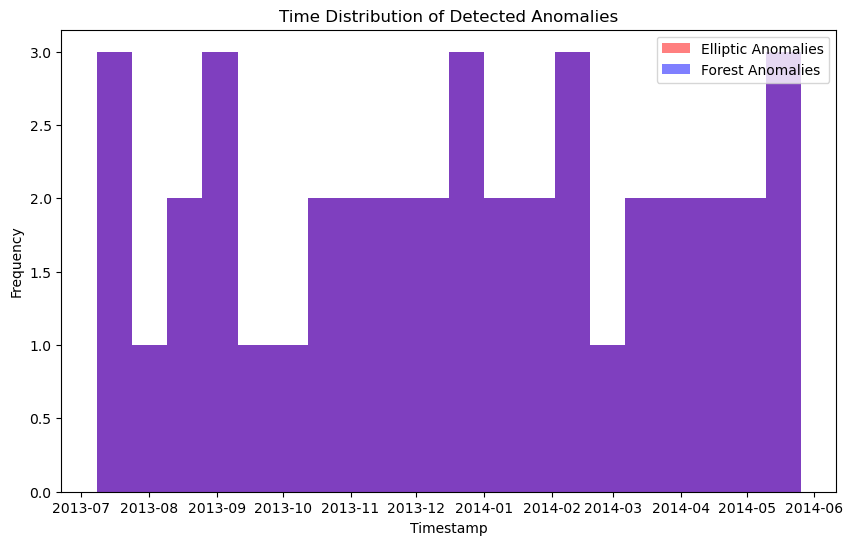

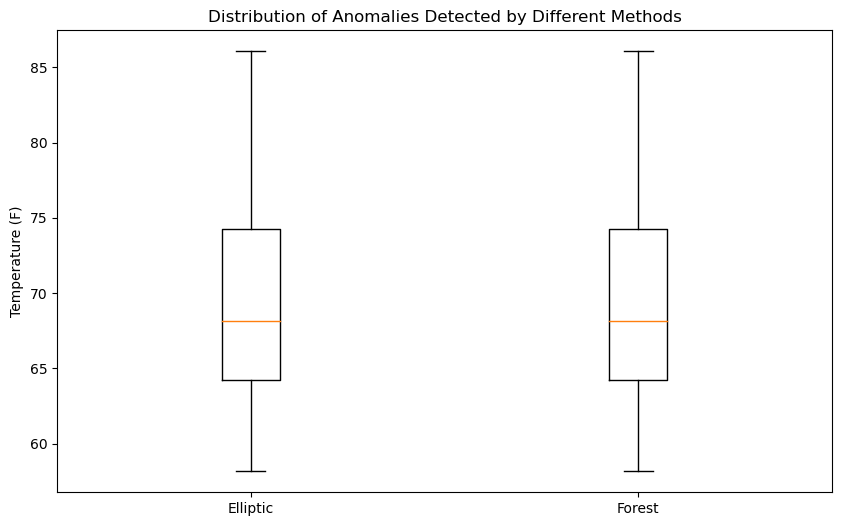

In [16]:
# Analyzing the time of occurrence of anomalies
plt.figure(figsize=(10, 6))
plt.hist(elliptic_anomalies['timestamp'], bins=20, alpha=0.5, color='red', label='Elliptic Anomalies')
plt.hist(forest_anomalies['timestamp'], bins=20, alpha=0.5, color='blue', label='Forest Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.title('Time Distribution of Detected Anomalies')
plt.legend()
plt.show()

# Comparing distributions or characteristics of anomalies
plt.figure(figsize=(10, 6))
plt.boxplot([elliptic_anomalies['value'], forest_anomalies['value']], labels=['Elliptic', 'Forest'])
plt.ylabel('Temperature (F)')
plt.title('Distribution of Anomalies Detected by Different Methods')
plt.show()

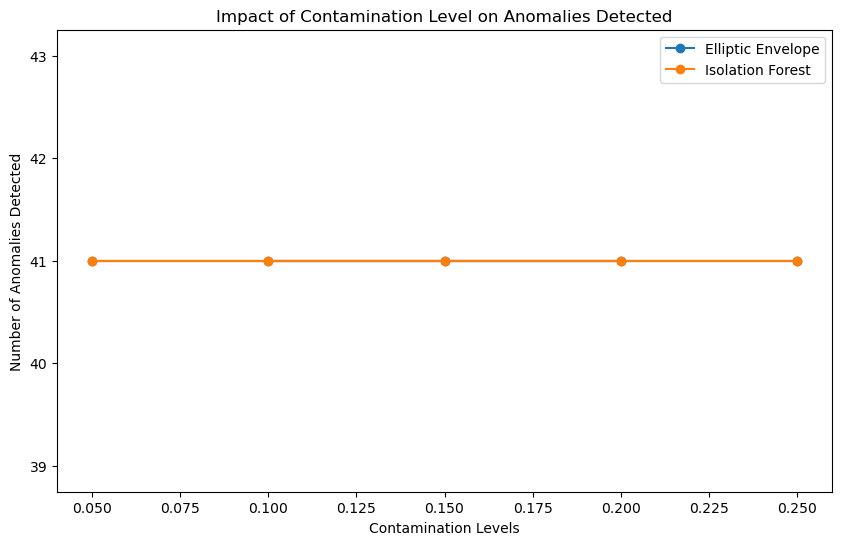

In [31]:
# Define a range of contamination levels to test
contamination_levels = [0.10, 0.25, 0.05, 0.15, 0.20]  

# Store results for different contamination levels
elliptic_anomaly_counts = []
forest_anomaly_counts = []

for contamination in contamination_levels:
    
    envelope = EllipticEnvelope(contamination=contamination)
    envelope.fit(X)  
    anomalies_elliptic = envelope.predict(X)
    elliptic_anomaly_count = len(data[data['anomalies_elliptic'] == -1])
    elliptic_anomaly_counts.append(elliptic_anomaly_count)

    forest = IsolationForest(contamination=contamination)
    forest.fit(X)  
    anomalies_forest = forest.predict(X)
    forest_anomaly_count = len(data[data['anomalies_forest'] == -1])
    forest_anomaly_counts.append(forest_anomaly_count)

# Visualize changes in detected anomalies with different contamination levels
plt.figure(figsize=(10, 6))
plt.plot(contamination_levels, elliptic_anomaly_counts, marker='o', label='Elliptic Envelope')
plt.plot(contamination_levels, forest_anomaly_counts, marker='o', label='Isolation Forest')
plt.xlabel('Contamination Levels')
plt.ylabel('Number of Anomalies Detected')
plt.title('Impact of Contamination Level on Anomalies Detected')
plt.legend()
plt.show()


In [33]:
from sklearn.metrics import accuracy_score

# Initialize variables for iterative improvement
best_elliptic_anomalies = None
best_forest_anomalies = None
best_accuracy = 0.0  

# Iterate through a range of parameters or algorithms for improvement
for param in range(1, 11):  
    
    envelope = EllipticEnvelope(contamination=0.1, random_state=param)  
    envelope.fit(X) 
    anomalies_elliptic = envelope.predict(X)

    forest = IsolationForest(contamination=0.1, random_state=param)  
    forest.fit(X)  
    anomalies_forest = forest.predict(X)

    
    # Calculate a performance metric 
    accuracy = accuracy_score(anomalies_elliptic, anomalies_forest)
    print(f"Iteration {param}: Accuracy - {accuracy:.4f}")

    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_elliptic_anomalies = anomalies_elliptic
        best_forest_anomalies = anomalies_forest

# Display the best model's performance
print(f"Best Model - Accuracy: {best_accuracy:.4f}")

Iteration 1: Accuracy - 0.9293
Iteration 2: Accuracy - 0.9469
Iteration 3: Accuracy - 0.9297
Iteration 4: Accuracy - 0.9707
Iteration 5: Accuracy - 0.9412
Iteration 6: Accuracy - 0.9295
Iteration 7: Accuracy - 0.9470
Iteration 8: Accuracy - 0.9290
Iteration 9: Accuracy - 0.9291
Iteration 10: Accuracy - 0.9469
Best Model - Accuracy: 0.9707
